In [28]:
##Folder to print results
folder_results = "Results/Montpellier2"
folder_station = "../mystations"
##Station
file = [folder_station * "/" * typedata * "_Montpellier.txt" for typedata in ["TN", "TG"]]

##AR model
p = 1
method_ = "monthly"
periodicity_model = "trigo"       # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period = 8                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype = "LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam = nothing                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model = "trigo"     # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period = 8                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype = "LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam = nothing                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n = 200

200

In [29]:
include("table_reader.jl")
include("utils/Missing_values.jl")
include("utils/Structure.jl")
include("utils/Plotting.jl")
cd(@__DIR__)

In [30]:
settings = OrderedDict((("file", file),
    ("p", p),
    ("method_", method_),
    ("periodicity_model", periodicity_model),
    ("degree_period", degree_period),
    ("Trendtype", Trendtype),
    ("trendparam", trendparam),
    ("σ_periodicity_model", σ_periodicity_model),
    ("σ_degree_period", σ_degree_period),
    ("σ_Trendtype", σ_Trendtype),
    ("σ_trendparam", σ_trendparam),
    ("n", n)))

OrderedDict{String, Any} with 12 entries:
  "file"                => ["../mystations/TN_Montpellier.txt", "../mystations/…
  "p"                   => 1
  "method_"             => "monthly"
  "periodicity_model"   => "trigo"
  "degree_period"       => 8
  "Trendtype"           => "LOESS"
  "trendparam"          => nothing
  "σ_periodicity_model" => "trigo"
  "σ_degree_period"     => 8
  "σ_Trendtype"         => "LOESS"
  "σ_trendparam"        => nothing
  "n"                   => 200

In [31]:
series_vec = truncate_MV.(extract_series.(file))
date_vec, x = Common_indexes(series_vec)

Caracteristics_Series_vec = init_CaracteristicsSeries.(series_vec)

2-element Vector{CaracteristicsSeries}:
 CaracteristicsSeries([2.7129870129870137, 2.6025974025974032, 2.4688311688311684, 2.583116883116883, 1.7454545454545447, 2.0909090909090917, 1.846753246753246, 1.8402597402597405, 2.106493506493506, 2.6259740259740254  …  3.3259740259740265, 3.9220779220779223, 3.511688311688312, 2.98961038961039, 2.594805194805195, 2.2194805194805194, 2.7857142857142856, 2.8000000000000016, 2.757142857142857, 2.8909090909090915], [11.9, 11.2, 9.5, 12.3, 10.8, 10.5, 12.2, 11.5, 10.6, 10.6  …  13.3, 13.0, 11.4, 12.4, 12.3, 11.0, 12.8, 14.3, 11.1, 11.2], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       2.42266      4.33502         14.5
   2 │     2       3.14257      4.35576         15.3
   3 │     3       5.50913      3.69526         15.1
   4 │     4       8.25918      2.98022         17.3
   5 │     5      11.8933   

In [32]:
Model = fit_Multi_AR(x, date_vec,
    p=p,
    method_=method_,
    periodicity_model=periodicity_model,
    degree_period=degree_period,
    Trendtype=Trendtype,
    trendparam=trendparam,
    σ_periodicity_model=σ_periodicity_model,
    σ_degree_period=σ_degree_period,
    σ_Trendtype=σ_Trendtype,
    σ_trendparam=σ_trendparam)


Multi_MonthlyAR([[[-0.13449004543775978 0.863510457693495; -0.43920605827914244 1.1641524546711832]], [[0.015216364180141823 0.7269106283527057; -0.3061296780092569 1.0784035174325122]], [[0.16979837841136636 0.4745180008178367; -0.2199243041032696 0.9121829512291102]], [[0.16694687708402897 0.41214337141623747; -0.16845244099498585 0.812961793948802]], [[0.23205167992460454 0.36962398175168193; -0.1164893566901603 0.801727747500791]], [[0.2250232290200537 0.45734358484663795; -0.0638796110143999 0.7868730332571143]], [[0.2629687917089364 0.3989416334415977; 0.004842902834213757 0.7157410696044435]], [[0.26629050101557916 0.3341394963007431; -0.030911270854123086 0.7145251340524951]], [[0.26404989954269004 0.3683254306316155; -0.10866100598402954 0.808538562395608]], [[0.12193724838465553 0.557801830862552; -0.239206147816964 0.9519024950197207]], [[-0.17143743647100848 0.8790956773320711; -0.46966411585614937 1.1645027172431166]], [[-0.16739480016544803 0.8934044258647931; -0.43367633

In [33]:
sample_ = rand(Model, n)

200-element Vector{Matrix{Float64}}:
 [-1.7999999999999998 4.400000000000001; -0.5610980312668747 6.524137670204018; … ; 3.9595357478843773 6.976092822139964; 0.3442620323004686 5.989698956689588]
 [-1.7999999999999998 4.400000000000001; -7.406893443232606 3.740713413099635; … ; 5.889233194700289 8.768093623069703; 3.298212546829431 6.610293963532323]
 [-1.7999999999999998 4.400000000000001; -2.80816089998977 5.584888388192486; … ; 5.5583403342444635 10.676634315358202; 6.411072553787603 10.157386829759732]
 [-1.7999999999999998 4.400000000000001; -1.2477186566185035 6.323543105989618; … ; -2.057347610990017 2.1785254404731758; 0.7386199886195546 7.01078040517515]
 [-1.7999999999999998 4.400000000000001; 6.062776682808867 8.876486688099398; … ; -0.22671189700590855 2.2597293050570544; -1.078776532308206 3.6114493383099653]
 [-1.7999999999999998 4.400000000000001; 2.4769023482754267 6.3767706244999935; … ; 4.309741649207778 6.367549720379161; 3.8827231817640797 5.057622633675946]
 [-1.7

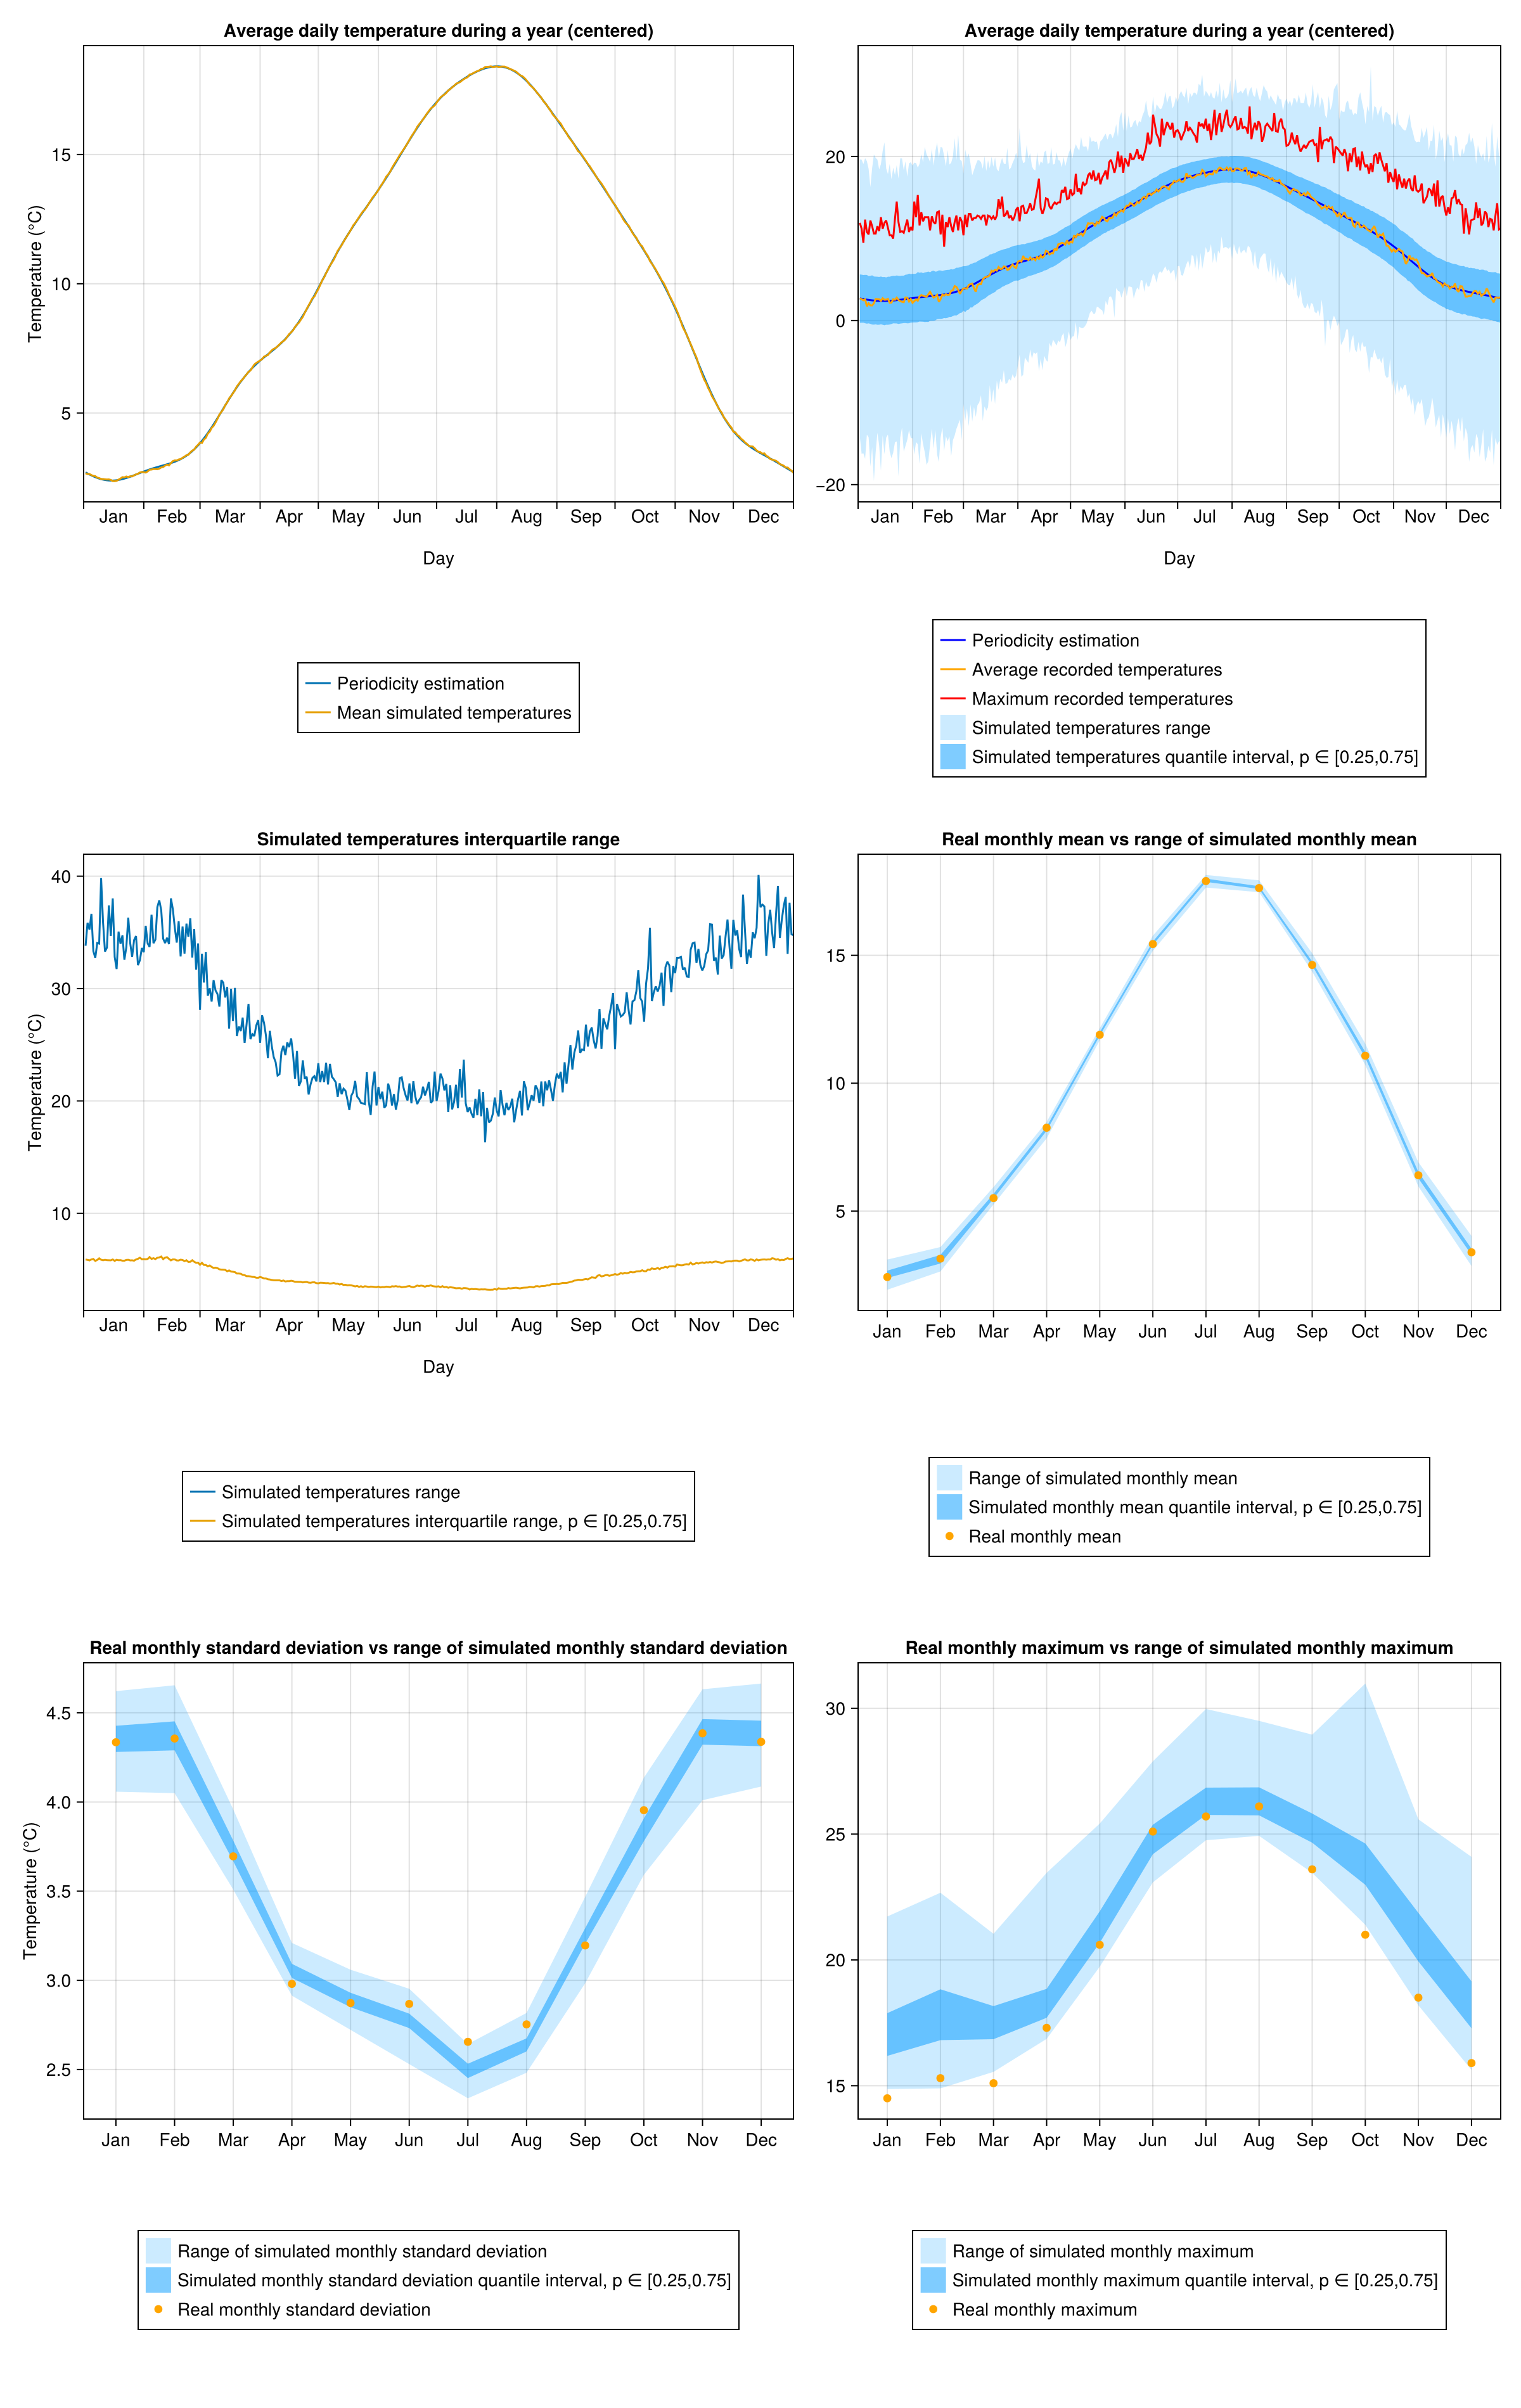

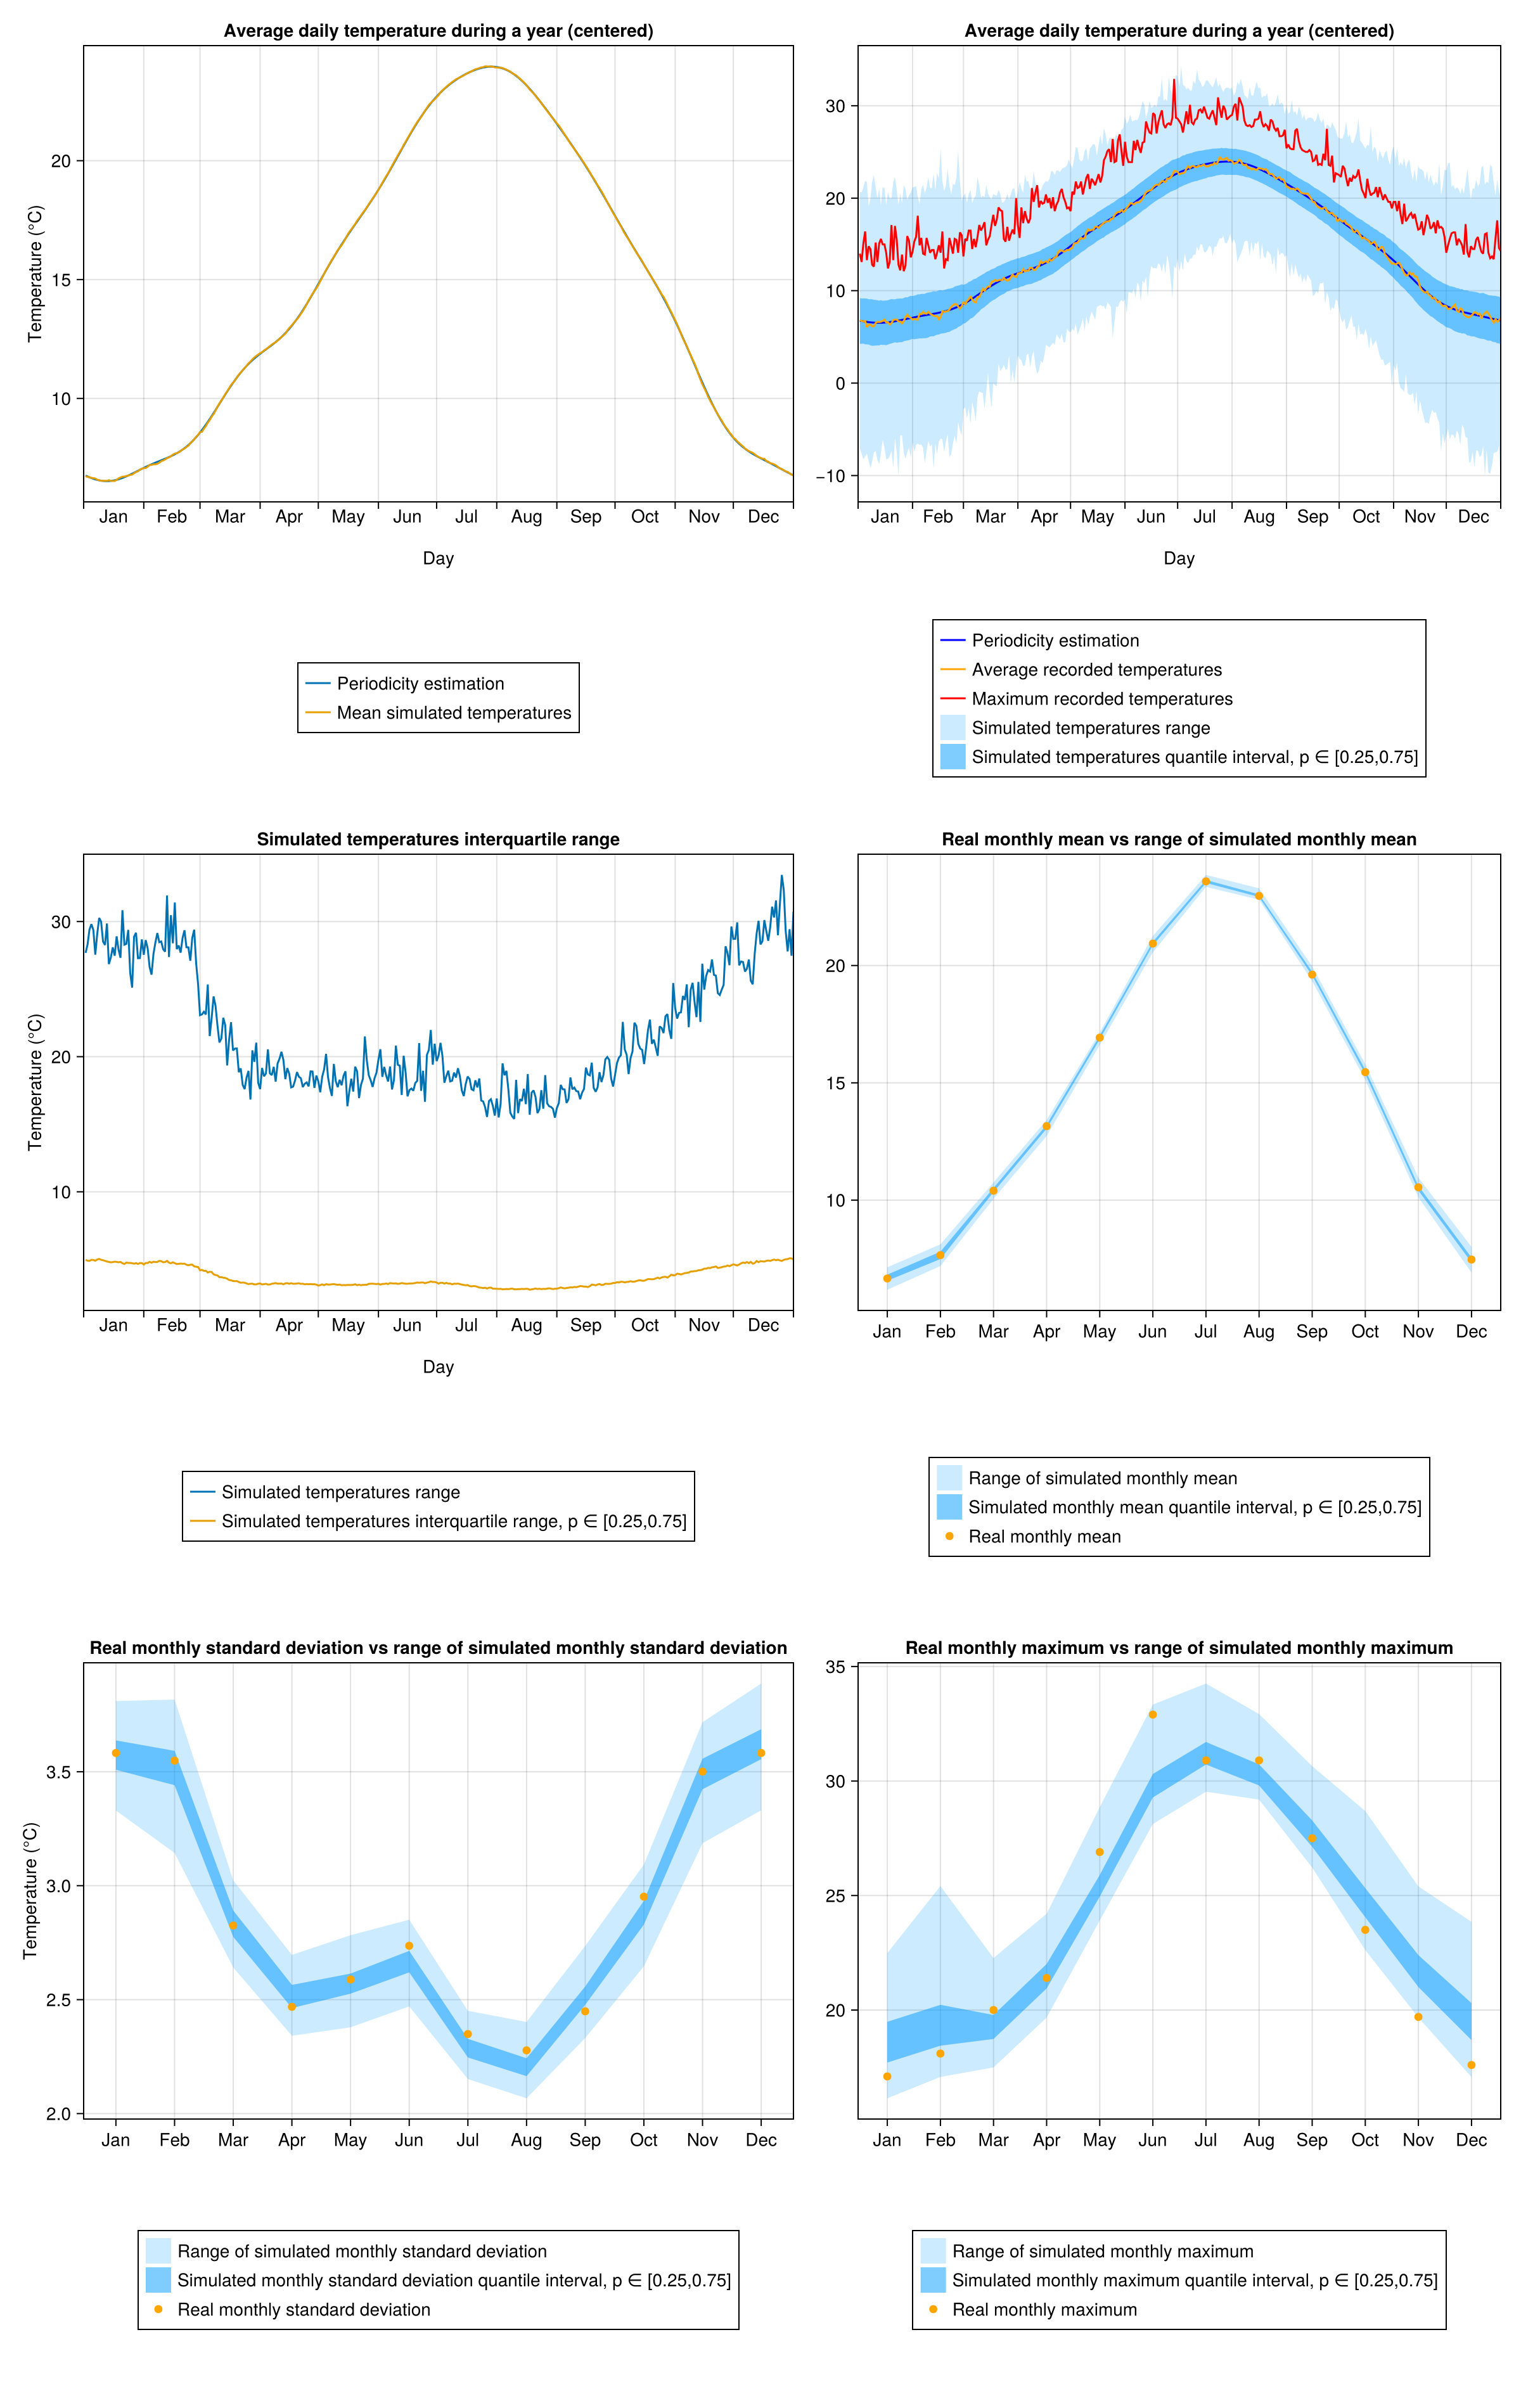

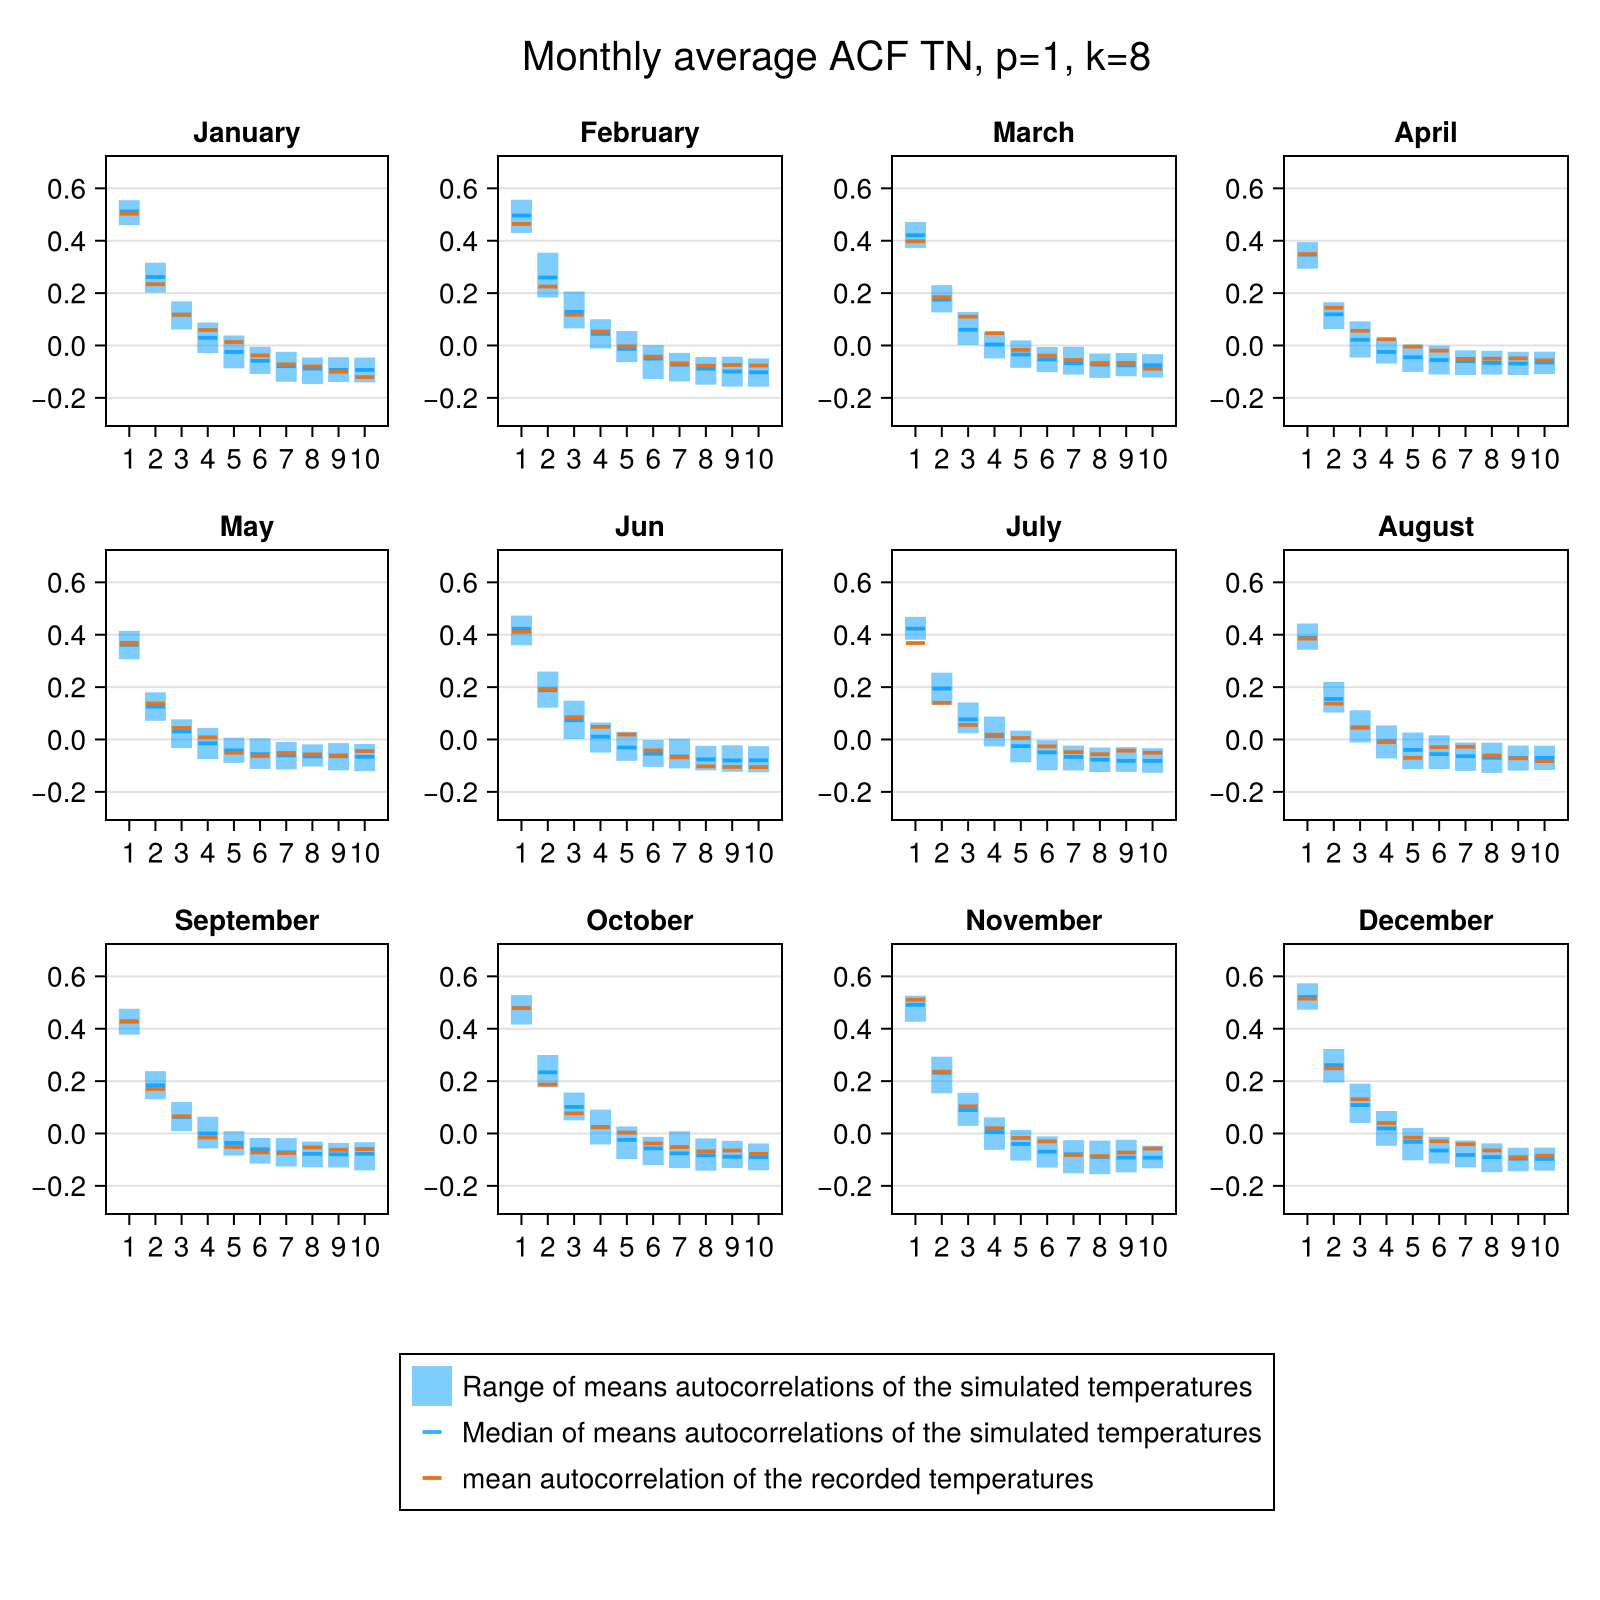

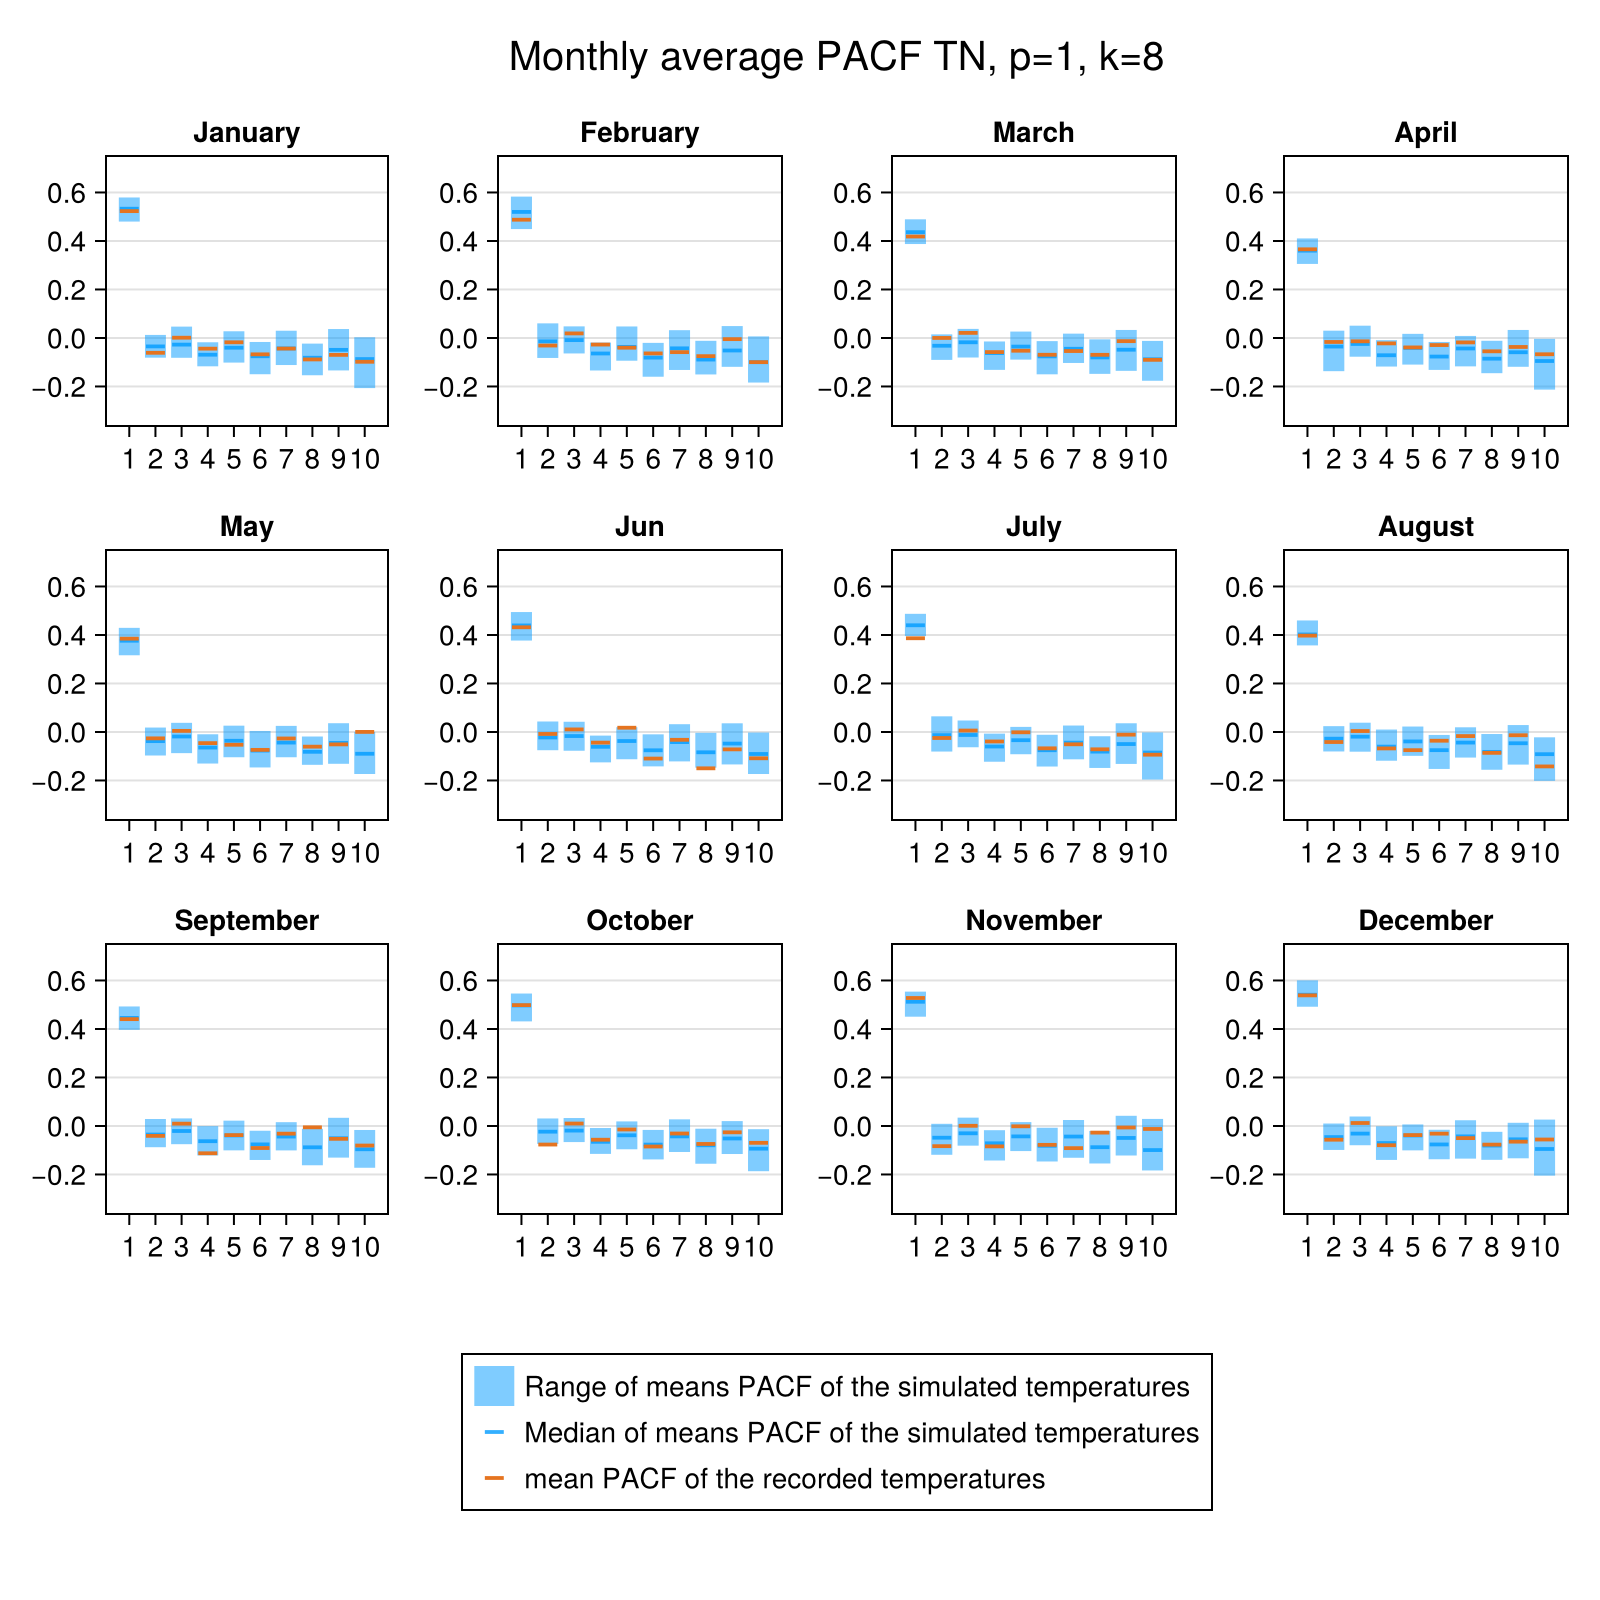

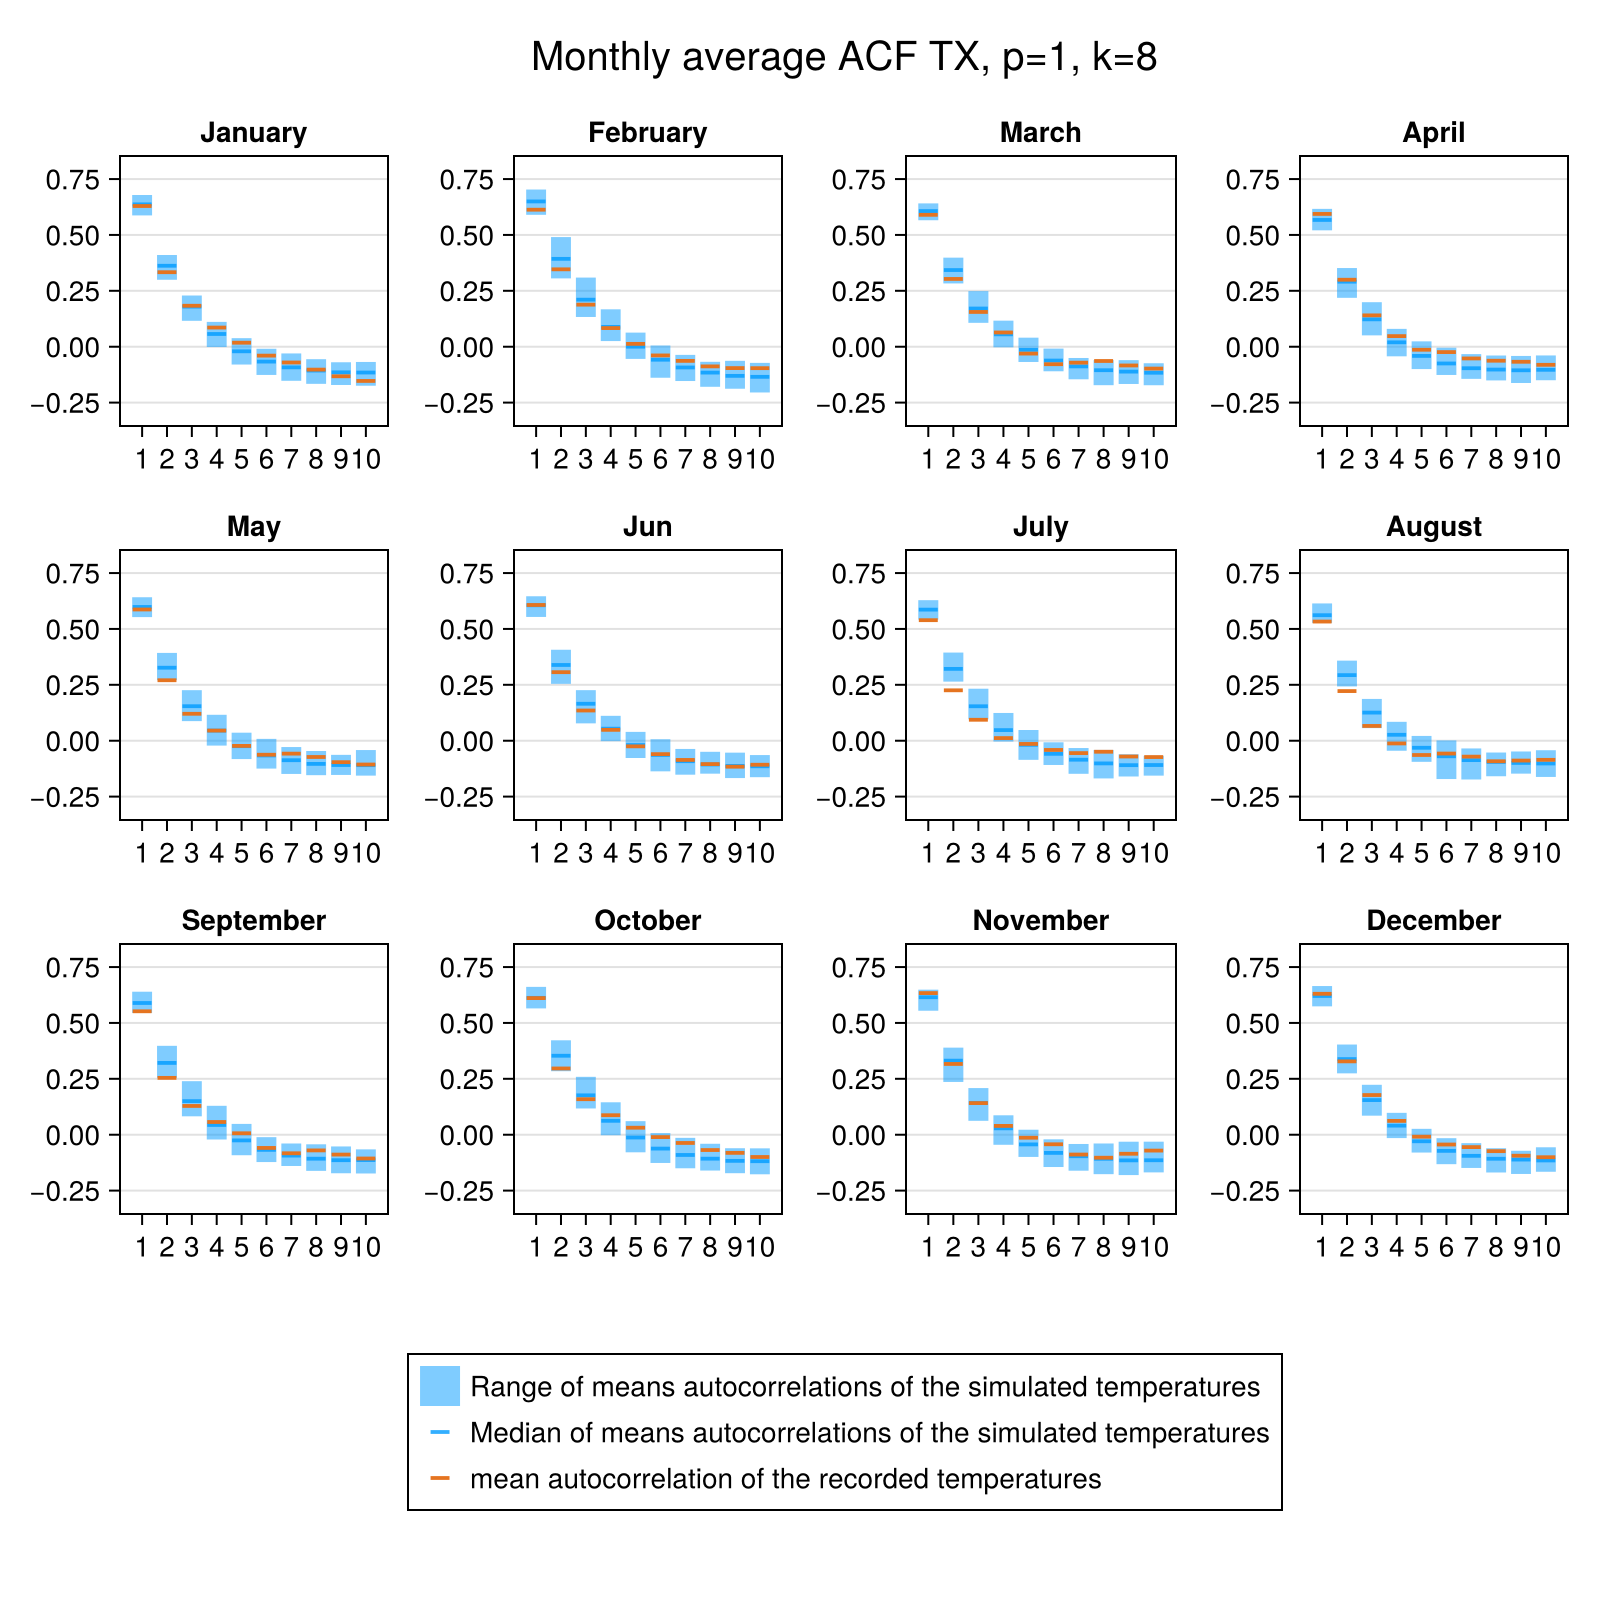

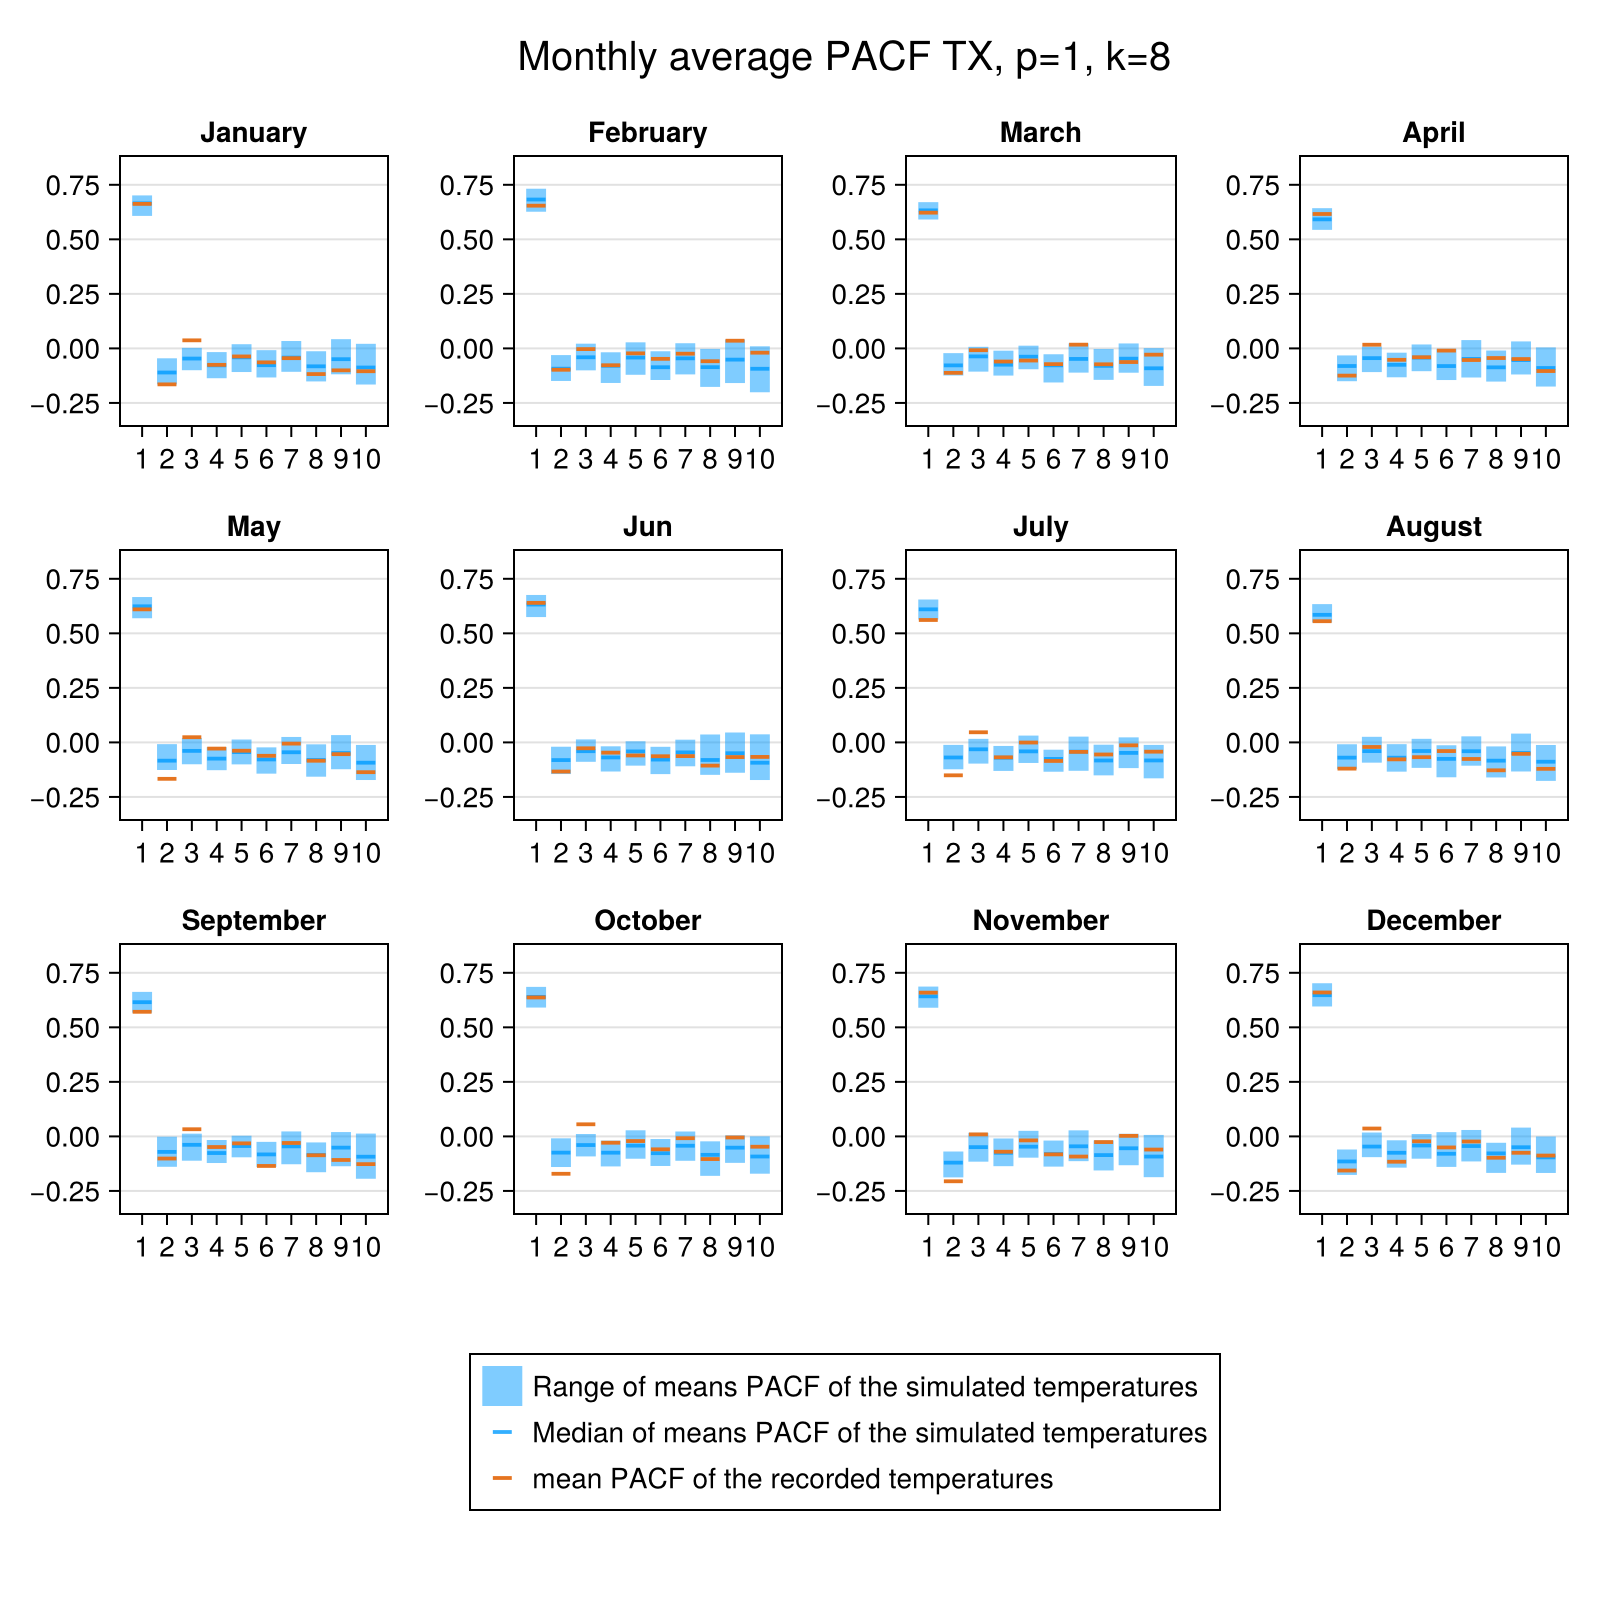

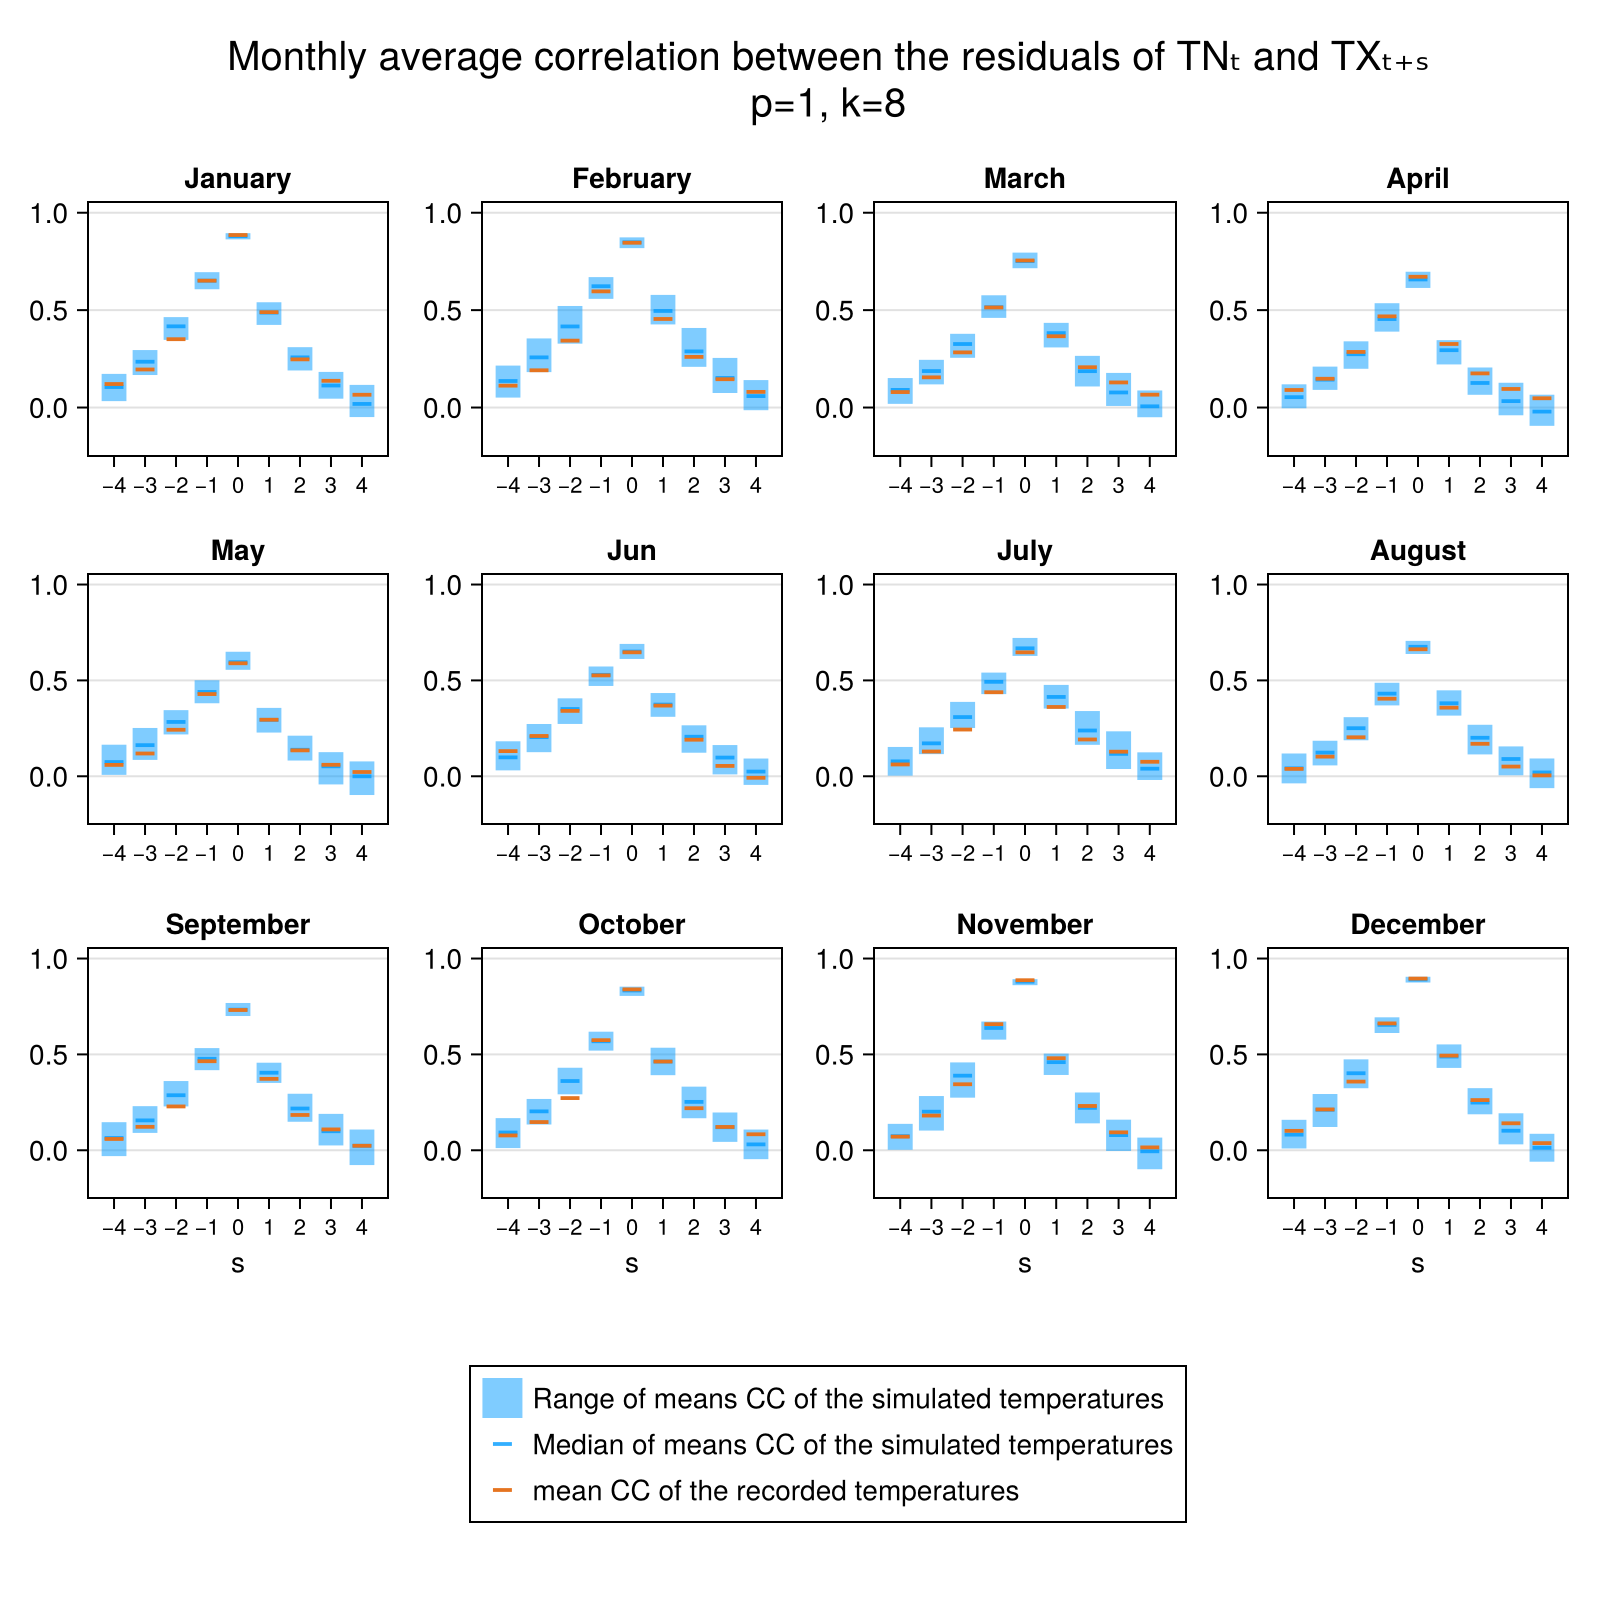

Number of scenarios with dates where TN > TX 200
Percentage of scenarios with dates where TN > TX 100.0 %
Mean percentage of dates where TN > TX : 0.84 %
Median percentage of dates where TN > TX : 0.84 %


In [34]:
fig_tuple = Sample_diagnostic(sample_, Caracteristics_Series_vec, Model, folder=folder_results, settings=settings)
save_model(Model, folder_results * "/model.jld2")
display.(fig_tuple)
println("Number of scenarios with dates where TN > TX $(sum(TN_Grt_TX.(sample_) .> 0))")
println("Percentage of scenarios with dates where TN > TX $(trunc(100*sum(TN_Grt_TX.(sample_) .> 0)/length(sample_),digits=2)) %")
println("Mean percentage of dates where TN > TX : $(trunc(100*mean(TN_Grt_TX.(sample_))/length(Model.date_vec),digits=2)) %")
println("Median percentage of dates where TN > TX : $(trunc(100*median(TN_Grt_TX.(sample_))/length(Model.date_vec),digits=2)) %")